In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import timeit

1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [2]:
m = np.arange(12).reshape((3,4))
print(m, "\n")

# number of elements in matrix m 
num = m.shape[0] * m.shape[1]

# total mean
sum = 0
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        sum += m[i,j]
print("Total mean:", sum / num)

print("")

# mean of each row
for i in range(m.shape[0]):
    sum = 0
    for j in range(m.shape[1]):
        sum += m[i,j]
    print("Mean of row", str(i+1) + ":", sum / m.shape[1])
    
print("")
    
# mean of each column
for i in range(m.shape[1]):
    sum = 0
    for j in range(m.shape[0]):
        sum += m[j,i]
    print("Mean of column", str(i+1) + ":", sum / m.shape[0])
        

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

Total mean: 5.5

Mean of row 1: 1.5
Mean of row 2: 5.5
Mean of row 3: 9.5

Mean of column 1: 4.0
Mean of column 2: 5.0
Mean of column 3: 6.0
Mean of column 4: 7.0


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
print("u:", u, "\n")
print("v:", v, "\n")

# using function outer in numpy
print("Using \"outer function \":\n", np.outer(u,v), "\n")

# using a for loop
m = np.zeros((4,4))
for i in range(u.shape[0]):
    for j in range(v.shape[0]):
        m[i,j] = u[i] * v[j]
print("Using a for loop:\n", m, "\n")

# using a numpy broadcasting operations 
u_1 = u.reshape(4,1) # taking the transpose of u
print("Using a numpy broadcasting operations:\n", u_1 * v, "\n")


u: [1 3 5 7] 

v: [2 4 6 8] 

Using "outer function ":
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Using a for loop:
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]] 

Using a numpy broadcasting operations:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 



3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [5]:
# generating the random matrix
m = npr.rand(10,6) * 3
print("Generated random matrix:\n\n", m, "\n\n")

# setting all entries <0.3 to zero
m[m < 0.3] = 0
print("After the mask:\n\n", m)

Generated random matrix:

 [[2.3507414  1.63215717 2.41863974 0.36823303 0.65973157 2.27294817]
 [1.67234828 2.67181784 2.65572858 2.99561955 1.91252539 0.74249464]
 [2.16082269 1.29393197 0.27784306 2.12536046 1.27306188 0.07247794]
 [1.52383759 2.75579215 2.06588351 2.46577261 0.13495237 2.64894555]
 [0.00766629 0.52220391 0.6596866  2.49498317 2.47863681 1.63621287]
 [2.51224708 1.68705316 1.11324899 1.9381643  2.5089425  0.62436066]
 [2.31216219 2.54885212 2.98397621 1.80818513 0.66501767 0.8596695 ]
 [2.90306384 1.60872966 0.58619267 1.73707469 0.58604832 0.17167867]
 [2.46992324 0.48091742 2.40698963 2.7184193  2.12505184 1.68578891]
 [0.74695411 2.36563857 2.1791335  0.47279921 1.16327869 2.95932149]] 


After the mask:

 [[2.3507414  1.63215717 2.41863974 0.36823303 0.65973157 2.27294817]
 [1.67234828 2.67181784 2.65572858 2.99561955 1.91252539 0.74249464]
 [2.16082269 1.29393197 0.         2.12536046 1.27306188 0.        ]
 [1.52383759 2.75579215 2.06588351 2.46577261 0.      

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

The vector is:

 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.

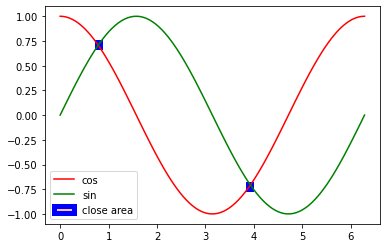

In [6]:
# vector of 100 numbers between 0 and 2*pi
v = np.linspace(0, 2*np.pi, 100)
print("The vector is:\n\n", v, "\n\n")

# extract every 10th element
ten = v[9::10]
print("Extract every 10th element:\n\n", ten, "\n\n")

# reverse the arry
reverse = v[::-1]
print("The reverse is:\n\n", reverse, "\n\n")

# sin and cos condition
sc = np.zeros(0)
for i in range(v.shape[0]):
    #if abs(np.cos(v[i])) - abs(np.sin(v[i])) < 0.1:
    if abs(np.cos(v[i]) - np.sin(v[i])) < 0.1:
        sc = np.concatenate((sc, np.array([v[i]])))
print("After sin and cos condition:\n\n", sc, "\n\n")

# plot
cos_func = np.cos(v)
sin_func = np.sin(v)
inter = np.zeros(v.shape[0])
for i in range(v.shape[0]):
    if abs(sin_func[i] - cos_func[i]) < 0.1 :
        inter[i] = 0.5
    else:
        inter[i] = None
        
fig, ax = plt.subplots()
ax.plot(v, cos_func, 'r-')
ax.plot(v, sin_func, 'g-')
#add rectangles to plot
ax.add_patch(Rectangle((sc[0],np.sin(sc[0])),sc[1]-sc[0],0.05,edgecolor='blue',facecolor='pink',fill=True,lw=5))
ax.add_patch(Rectangle((sc[2],np.cos(sc[2])),sc[3]-sc[2],0.05,edgecolor='blue',facecolor='pink',fill=True,lw=5))
ax.legend(['cos', 'sin', 'close area'])
print("Plot:")
plt.show()

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [7]:
# 10 by 10 multiplication table
u = np.array(range(1,11))
v = u.reshape(10,1)
m = v * u
print("The 10 by 10 multuplication table is:\n\n", m, "\n\n")

# find the trace
trace = 0
for i in range(10):
    trace += m[i,i]
# Or: trace = np.trace(m)
print("The trace is:", trace, "\n")

# find the anti-diagonal
mylist = []
for i in range(10):
    mylist.append(m[i,9-i])
ant_diag = np.array(mylist)
# Or: ant_diag = np.diagonal(m[::-1])
print("The anti-diagonal is:", ant_diag, "\n")

# find the offset diagonal
mylist = []
for i in range(9):
    mylist.append(m[i,i+1])
off_diag = np.array(mylist)
# Or: off_diag = np.diagonal(m[0:9,1:10])
print("The offset diagonal is:", off_diag)

The 10 by 10 multuplication table is:

 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 


The trace is: 385 

The anti-diagonal is: [10 18 24 28 30 30 28 24 18 10] 

The offset diagonal is: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [8]:
# initial data
cities = ["Chicago ", "Springfield ", "Saint-Louis ", "Tulsa ", "Oklahoma City ", "Amarillo ", "Santa Fe ", "Albuquerque ", "Flagstaff ", "Los Angeles"]
miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
km = miles * 1.60934

# grid computation
route66_miles = abs(miles.reshape(10,1) - miles)
route66_km = abs(km.reshape(10,1) - km)

# print the results
print("Grid in miles:\n")
print(pd.DataFrame(route66_miles, index=cities, columns=cities))
print("\n\n\nGrid in km:\n")
print(pd.DataFrame(route66_km, index=cities, columns=cities))

Grid in miles:

                Chicago   Springfield   Saint-Louis   Tulsa   Oklahoma City   \
Chicago                0           198           303     736             871   
Springfield          198             0           105     538             673   
Saint-Louis          303           105             0     433             568   
Tulsa                736           538           433       0             135   
Oklahoma City        871           673           568     135               0   
Amarillo            1175           977           872     439             304   
Santa Fe            1475          1277          1172     739             604   
Albuquerque         1544          1346          1241     808             673   
Flagstaff           1913          1715          1610    1177            1042   
Los Angeles         2448          2250          2145    1712            1577   

                Amarillo   Santa Fe   Albuquerque   Flagstaff   Los Angeles  
Chicago              1175

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

Standard method needs 0.001032 sec, and the result is:

 [ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97] 


N vs time:


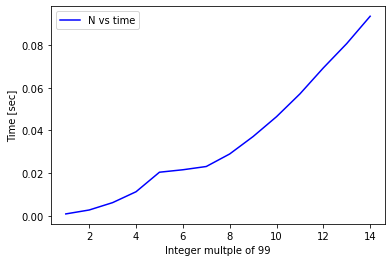


Optimized method needs 0.000282 sec, and the result is:

 [ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


In [9]:
# standard function to compute the first N prime numbers
def prime_comp(N):
    mask = np.ones(N, dtype=bool)
    # computing the mask 
    for i in range(2, N+1):
        for j in range(2, N+1):
            if j % i == 0 and i != j:
                mask[j-1] = False
    return mask 

# computing the prime numbers
start_time = timeit.default_timer()
N = 99
numbers = np.array(range(1,N+1))
mask = prime_comp(N)
primes = numbers[mask]
end_time = timeit.default_timer()
time = end_time - start_time
print("Standard method needs", round(time, 6), "sec, and the result is:\n\n", primes, "\n\n")

# how does the time scale with N?
# looking to the graph we can see that the computation time
# grows fairly quickly when we increase the size of the 
# instance. of course, using "prime_comp(N)" function it is
# proportional to N^2
mytime = []
end = 15
for i in range(1,end):
    start_time = timeit.default_timer()
    N1 = 99*i
    mask = prime_comp(N1)
    end_time = timeit.default_timer()
    time = end_time - start_time
    mytime.append(time)
fig, ax = plt.subplots()
ax.plot(range(1,end), mytime, 'b-')
plt.xlabel("Integer multple of " + str(N))
plt.ylabel("Time [sec]")
ax.legend(['N vs time'])
print("N vs time:")
plt.show()

def opt_prime(N):
    mask = np.ones(N, dtype=bool)
    i = 2 # index of prime numbers 
    while i < N:
        for j in range(4,N+1):
            if j % i == 0 and i != j:
                mask[j-1] = False
        flag = True
        # searching the next prime
        while flag and i < N:
            i += 1
            if mask[i-1] == True:
                flag = False
    return mask

# computing the prime numbers with optimized method
start_time = timeit.default_timer()
N = 99
numbers = np.array(range(1,N+1))
mask = opt_prime(N)
primes = numbers[mask]
end_time = timeit.default_timer()
time = end_time - start_time
print("\nOptimized method needs", round(time, 6), "sec, and the result is:\n\n", primes)

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

Random walk matrix: 

 [[-1 -1 -1 ... -1  1 -1]
 [-1 -1 -1 ...  1 -1 -1]
 [ 1  1  1 ...  1 -1  1]
 ...
 [-1 -1 -1 ...  1 -1 -1]
 [ 1 -1 -1 ...  1 -1 -1]
 [ 1  1  1 ...  1  1  1]] 


The distances at each step for all the walkers are:

 [[ -1  -2  -3 ...   2   3   2]
 [ -1  -2  -3 ... -22 -23 -24]
 [  1   2   3 ...   4   3   4]
 ...
 [ -1  -2  -3 ... -20 -21 -22]
 [  1   0  -1 ...   2   1   0]
 [  1   2   3 ...  12  13  14]] 


The squared distances at each step for all the walkers are:

 [[  1   4   9 ...   4   9   4]
 [  1   4   9 ... 484 529 576]
 [  1   4   9 ...  16   9  16]
 ...
 [  1   4   9 ... 400 441 484]
 [  1   0   1 ...   4   1   0]
 [  1   4   9 ... 144 169 196]] 


The mean of square distances of each step is:

 [  1.      2.088   3.16    4.368   5.224   6.008   7.392   8.716   9.72
  10.432  11.584  12.808  14.128  15.172  16.072  17.512  18.792  19.812
  20.68   21.66   22.2    24.016  24.808  26.208  27.232  28.312  29.176
  30.828  31.904  33.396  33.944  35.636  36.3

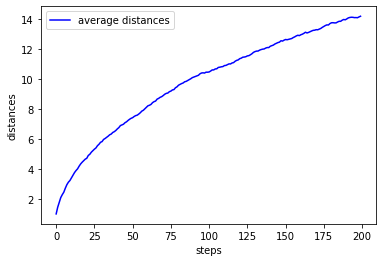

In [10]:
# initial data
walkers = 1000
steps = 200

# random walk matrix
rw = npr.randint(2,size=(walkers,steps))
rw[rw == 0] = -1
print("Random walk matrix: \n\n", rw,"\n\n")

# computing distances at each step
distances = np.copy(rw)
for i in range(walkers):
    for j in range(1,steps):
        distances[i,j] += distances[i,j-1]
print("The distances at each step for all the walkers are:\n\n", distances, "\n\n")

# squared distances
squared_dist = np.square(distances)
print("The squared distances at each step for all the walkers are:\n\n", squared_dist, "\n\n")

# mean of square distances
mean_sq = np.mean(squared_dist, axis=0)
print("The mean of square distances of each step is:\n\n", mean_sq, "\n\n")

# average distances plot
avg_dist = np.sqrt(mean_sq)
fig, ax = plt.subplots()
ax.plot(range(steps), avg_dist, 'b-')
plt.xlabel("steps")
plt.ylabel("distances")
ax.legend(["average distances"])
print("Average distances as a function of step:")
plt.show()